# Dimension Reduction

### retrieve [raw, picks, epochs,events.event_ids] data

In [46]:
from pickleshare import PickleShareDB
db = PickleShareDB('./tmp')
raw = db['raw']
originalRaw = db['originalRaw']
epochs = db['epochs']
events = db['events']
picks = db['picks']
events_ids = db['events_ids']

### import necessary packages

In [95]:
%matplotlib inline
import matplotlib.pyplot as plt
from mne.decoding import CSP
import mne
mne.set_log_level("CRITICAL")

### define all events labels

In [ ]:
labels = {
0: 'do/feet',
1: 'do/hands', 
2: 'imagine/feet',
3: 'imagine/hands',
4: 'rest'
}

## Scatter X,Y data;

### Picks epochs regarding "HANDS" for Action/Imagination experiments 

In [203]:
X = epochs['hands'].get_data(copy=False )
y = epochs['hands'].events[:, -1] - 1
print(y)

[1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1
 1 3 3 3 3 3 3 3 3]


## Experiment CSP (Common Spatial Patterns)

In [198]:
csp = CSP()

In [199]:
X_csp = csp.fit_transform(X, y)

### plot before/after apply CSP (channel 7 as example)

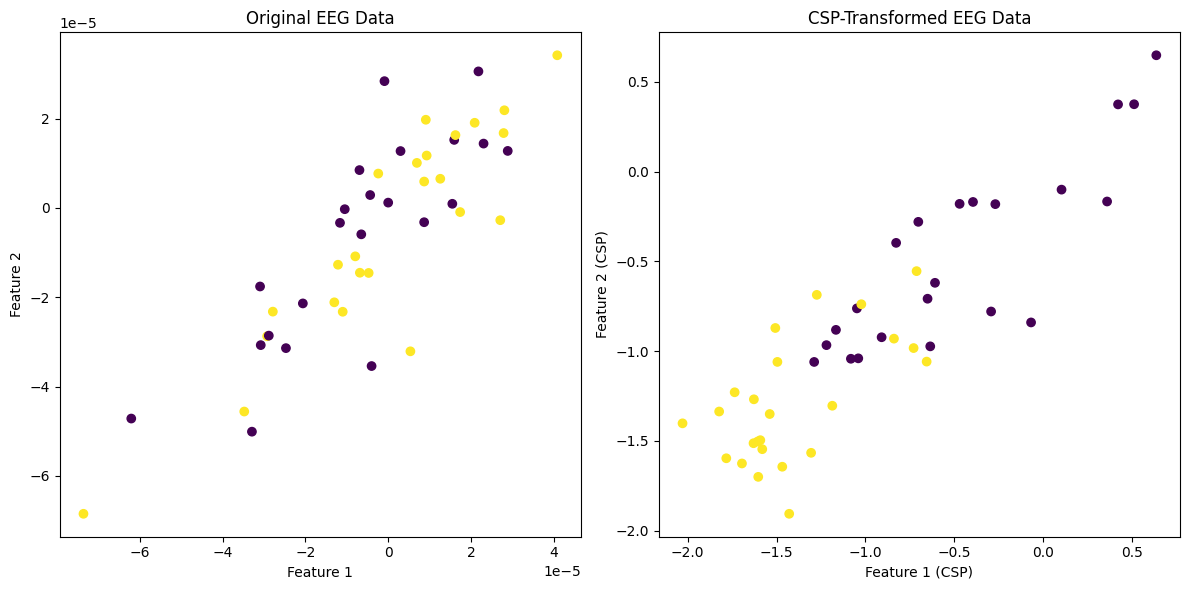

In [202]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming X is your EEG data, and X_csp is the CSP-transformed data
channel_index = 7  # Choose the channel you want to plot

# Original EEG Data
X_channel = X[:, channel_index, :]
X_2D = X_channel.reshape((X_channel.shape[0], -1))

# Scatter plot for Original EEG Data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_2D[:, 0], X_2D[:, 1], c=y, cmap='viridis')
plt.title('Original EEG Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# CSP-Transformed Data
X_csp_2D = X_csp.reshape((X_csp.shape[0], -1))

# Scatter plot for CSP-Transformed Data
plt.subplot(1, 2, 2)
plt.scatter(X_csp_2D[:, 0], X_csp_2D[:, 1], c=y, cmap='viridis')
plt.title('CSP-Transformed EEG Data')
plt.xlabel('Feature 1 (CSP)')
plt.ylabel('Feature 2 (CSP)')

plt.tight_layout()
plt.show()
